
文章中的代码基于四个主要的Python数据分析和处理的类库：numpy，matplotlib，sklearn和networkx。

## 数据导入和可视化


###  数据导入

In [7]:
# 从网上下载数据并保存
import urllib2
url = 'http://aima.cs.berkeley.edu/data/iris.csv'
u = urllib2.urlopen(url)
localFile = open('iris.csv','w')
localFile.write(u.read())
localFile.close()

数据集以CSV(逗号分割值）的格式存储。CSV文件可以很方便的转化并把其中的信息存储为适合的数据结构。此数据集有5列，前4列包含着特征值，最后一列代表着样本类型。CSV文件很容易被numpy类库的genfromtxt方法解析：

In [8]:
# 创建了一个包含特征值的矩阵以及一个包含样本类型的向量。
from numpy import genfromtxt, zeros
# read the first 4 columns
data = genfromtxt('iris.csv',delimiter=',',usecols=(0,1,2,3)) 
# read the fifth column
target = genfromtxt('iris.csv',delimiter=',',usecols=(4),dtype=str)


在上面的例子中我们创建了一个包含特征值的矩阵以及一个包含样本类型的向量。我们可以通过查看我们加载的数据结构的shape值来确认数据集的大小：

In [42]:
# 通过查看我们加载的数据结构的shape值来确认数据集的大小：
print data.dtype
print data.shape
(150, 4)
print target.shape
(150,)
# 查看我们有多少种样本类型以及它们的名字：
print set(target) # build a collection of unique elements
print target
print data.view

float64
(150, 4)
(150,)
set(['setosa', 'versicolor', 'virginica'])
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' '

### 可视化
当我们处理新数据的时候，一项很重要的任务是尝试去理解数据包含的信息以及它的组织结构。可视化可以灵活生动的展示数据，帮助我们深入理解数据。

使用pylab类库（matplotlib的接口）的plotting方法可以建一个二维散点图让我们在两个维度上分析数据集的两个特征值：

/Users/wente/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


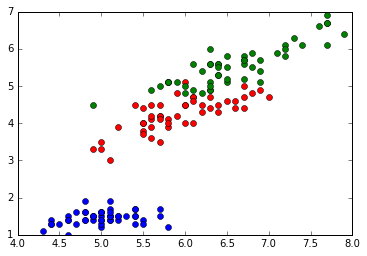

In [10]:
# 建立一个二维散点图让我们在两个维度上分析数据集的两个特征值：
from pylab import plot, show
% matplotlib inline
plot(data[target=='setosa',0],data[target=='setosa',2],'bo')
plot(data[target=='versicolor',0],data[target=='versicolor',2],'ro')
plot(data[target=='virginica',0],data[target=='virginica',2],'go')
show()

在上图中有150个点，不同的颜色代表不同的类型；蓝色点代表山鸢尾，红色点代表变色鸢尾，绿色点代表维吉尼亚鸢尾。

另一种常用的查看数据的方法是分特性绘制直方图。在本例中，既然数据被分为三类，我们就可以比较每一类的分布特征。下面这个代码可以绘制数据中每一类型的第一个特性（花萼的长度）：

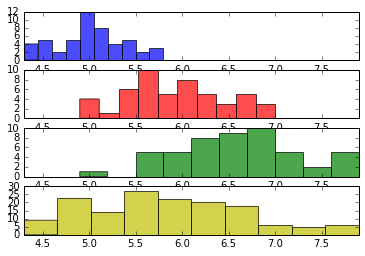

In [11]:
from pylab import figure, subplot, hist, xlim, show
xmin = min(data[:,0])
xmax = max(data[:,0])
figure()
subplot(411) # distribution of the setosa class (1st, on the top)
hist(data[target=='setosa',0],color='b',alpha=.7)
xlim(xmin,xmax)
subplot(412) # distribution of the versicolor class (2nd)
hist(data[target=='versicolor',0],color='r',alpha=.7)
xlim(xmin,xmax)
subplot(413) # distribution of the virginica class (3rd)
hist(data[target=='virginica',0],color='g',alpha=.7)
xlim(xmin,xmax)
subplot(414) # global histogram (4th, on the bottom)
hist(data[:,0],color='y',alpha=.7)
xlim(xmin,xmax)
show()


## 分类
sklearn类库包含很多分类器的实现，我们将会用高斯朴素贝叶斯来分析我们在第一章载入的鸢尾花数据，包含山鸢尾、变色鸢尾和维吉尼亚鸢尾。

In [12]:
# 把字符串数组转型成整型数据：
t = zeros(len(target))
t[target == 'setosa'] = 1
t[target == 'versicolor'] = 2
t[target == 'virginica'] = 3

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.]


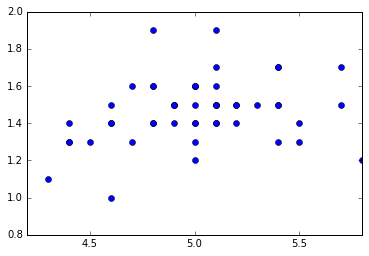

In [41]:
plot(data[t==1.0,0],data[t==1,2],'bo')
print t

In [13]:
## 分类器实例化和训练分类器的准备了：
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(data,t) # training on the iris dataset

GaussianNB()

很简单的检测：

In [14]:
# 很简单的检测：
# 分类器可以由predict方法完成，并且只要输出一个样例就可以很简单的检测：
print classifier.predict(data[0])
print t[0]

[ 1.]
1.0


/Users/wente/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### 拆分训练集和测试集
上面的测试使用了训练集的数据，但是在广泛的样本上评估分类器并且使用非训练环节的数据测试是很重要的。最终我们通过从源数据集中随机抽取样本把数据分为训练集和测试集。我们将会使用训练集的数据来训练分类器，并使用测试集的数据来测试分类器。train_test_split方法正是实现此功能的：

In [15]:
# 从样本中随机的按比例选取train data和test data。
from sklearn import cross_validation
train, test, t_train, t_test = cross_validation.train_test_split(data, t, test_size=0.4, random_state=0)

数据集被分一分为二，测试集被指定为源数据的40%（命名为test_size），random_state是随机数的种子。不同的种子会造成不同的随机采样结果。相同的种子采样结果相同。

下面就是利用其反复训练我们的分类器并输出精确度

In [16]:
classifier.fit(train,t_train) # train


GaussianNB()

### 评价：精确度

In [17]:
print classifier.score(test,t_test) # test

0.933333333333


上面得出精确度为93%。一个分类器的精确度是通过正确分类样本的数量除以总样本的数量得出的。也就是说，它意味着我们正确预测的比例。

### 评价：混淆矩阵
另一个估计分类器表现的工具叫做混淆矩阵。在此矩阵中每列代表一个预测类的实例，每行代表一个实际类的实例。

In [18]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(classifier.predict(test),t_test)

[[16  0  0]
 [ 0 23  4]
 [ 0  0 17]]


混淆矩阵的评价：所有正确的预测都在表格的对角线上，的错误就即对角线以外的非零值。
在这个混淆矩阵中我们可以看到所有山鸢尾和维吉尼亚鸢尾都被正确的分类了，但是实际上应该是26个的变色鸢尾，系统却预测其中4个是维吉尼亚鸢尾。如果

### 评价：分类器性能报告

In [19]:
from sklearn.metrics import classification_report
print classification_report(classifier.predict(test), t_test, target_names=['setosa', 'versicolor', 'virginica'])

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.85      0.92        27
  virginica       0.81      1.00      0.89        17

avg / total       0.95      0.93      0.93        60



以下是该报告使用到的方法总结：
Precision：正确预测的比例
Recall（或者叫真阳性率）：正确识别的比例
F1-Score：precision和recall的调和平均数

### 评价：交叉验证

思想：多次将数据分为不同的训练集和测试集，最终分类器评估选取多次预测的平均值。方法：

In [20]:
from sklearn.cross_validation import cross_val_score
# cross validation with 6 iterations 
scores = cross_val_score(classifier, data, t, cv=6)
print scores

[ 0.92592593  1.          0.91666667  0.91666667  0.95833333  1.        ]


输出是每次模型迭代产生的精确度的数组。我们可以很容易计算出平均精确度：

In [21]:
from numpy import mean
print mean(scores)

0.952932098765


## 聚类
是一种无监督数据分析，下面就是最著名的聚类工具k-means算法

In [22]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3, init='random') # initialization
kmeans.fit(data) # actual execution

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

上面运行k-measn算法并把数据分为三个群集（参数n_clusters所指定的）。下面使用模型把每一个样本分配到三个群集中：

In [23]:
c = kmeans.predict(data)

### 评估：完整性得分、同质性得分
估计群集的结果，与使用完整性得分和同质性得分计算而得的标签作比较：

大部分数据点属于一个给定的类并且属于同一个群集，那么完整性得分就趋向于1。
当所有群集都几乎只包含某个单一类的数据点时同质性得分就趋向于1.

In [24]:
from sklearn.metrics import completeness_score, homogeneity_score
print completeness_score(t,c)
print homogeneity_score(t,c)

0.764986151449
0.751485402199


### 评估：结果可视化

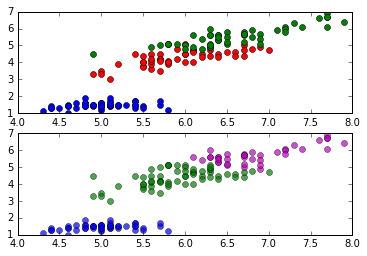

In [25]:
figure()
subplot(211) # top figure with the real classes
plot(data[t==1,0],data[t==1,2],'bo')
plot(data[t==2,0],data[t==2,2],'ro')
plot(data[t==3,0],data[t==3,2],'go')
subplot(212) # bottom figure with classes assigned automatically
plot(data[c==2,0],data[c==2,2],'bo',alpha=.7)
plot(data[c==1,0],data[c==1,2],'go',alpha=.7)
plot(data[c==0,0],data[c==0,2],'mo',alpha=.7)
show()

观察此图我们可以看到，底部左侧的群集可以被k-means完全识别，然而顶部的两个群集有部分识别错误。

## 回归
回归是一个用于预测变量之间函数关系调查的方法。例如，我们有两个变量，一个被认为是解释，一个被认为是依赖。我们希望使用模型描述两者的关系。当这种关系是一条线的时候就称为线性回归。

In [26]:
# 构建数据集
from numpy.random import rand
x = rand(40,1) # explanatory variable
y = x*x*x+rand(40,1)/5 # depentend variable

In [27]:
# 训练
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##  评估：结果可视化
把拟合线和实际数据点画在同一幅图上来评估结果：

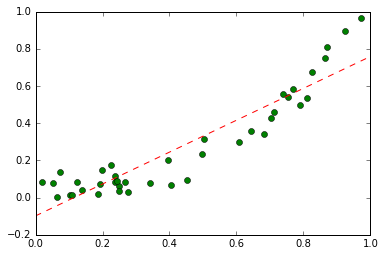

In [28]:
from numpy import linspace, matrix
xx = linspace(0,1,40) # 产生0-1之间40个数，步长相等
plot(x,y,'go')
plot(xx,linreg.predict(matrix(xx).T),'--r')
show()

### 评估：均方误差
使用均方误差来量化模型和原始数据的拟合度：
该指标度量了预期的拟合线和真实数据之间的距离平方。当拟合线很完美时该值为0。

In [29]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(linreg.predict(x),y)

0.0104075676668


## 降维
最著名的降维技术之一就是主成分分析（PCA）。该技术把数据变量转换为等量或更少的不相关变量，称为主成分（PCs）。

下面我们实例化了一个PCA对象，用于计算前两个主成分。

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

### 转换计算如下：
将原来的四维数据转换为两维

In [31]:
pcad = pca.fit_transform(data)

### 结果可视化

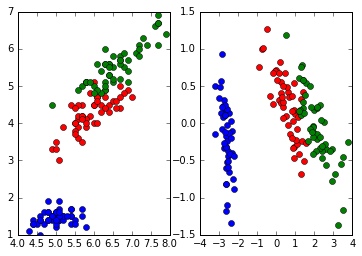

In [32]:
## 原来的数据
subplot(121)  
plot(data[target=='setosa',0],data[target=='setosa',2],'bo')
plot(data[target=='versicolor',0],data[target=='versicolor',2],'ro')
plot(data[target=='virginica',0],data[target=='virginica',2],'go')
## 降维后的数据
subplot(122)
plot(pcad[target=='setosa',0],pcad[target=='setosa',1],'bo')
plot(pcad[target=='versicolor',0],pcad[target=='versicolor',1],'ro')
plot(pcad[target=='virginica',0],pcad[target=='virginica',1],'go')


两个图有些相似，降维后，变色鸢尾（红色的）和维吉尼亚鸢尾（绿色的）的间隔更清晰了。

### 信息量判断

In [33]:
#方差比判断PCs包含的信息量：
print pca.explained_variance_ratio_

[ 0.92461621  0.05301557]


In [34]:
# 输出在转化过程中丢失的信息量
print 1-sum(pca.explained_variance_ratio_)

0.0223682249752


In [35]:
# 通过改变主成分的数值来计算我们能够覆盖多少信息量
for i in range(1,5):
    pca = PCA(n_components=i)
    pca.fit(data)
    print sum(pca.explained_variance_ratio_) * 100,'%'

92.4616207174 %
97.7631775025 %
99.481691455 %
100.0 %


可以发现PCs用得越多，信息覆盖就越全，